# Color-coding Individual Conditional Expectation (ICE) plots 

In PyMint, we can color-code the ICE plots by the value of another feature to expose potential feature interactions. 

In [1]:
import sys, os 
sys.path.append(os.path.dirname(os.getcwd()))
import pymint
import shap
import plotting_config 

In [2]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.cm import PuOr
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
estimators = pymint.load_models()
X,y = pymint.load_data()
# if any features are categorical, set the type and MintPy will calculate
# the categorical ALE. 
X = X.astype({'urban': 'category', 'rural':'category'})

In [4]:
explainer = pymint.InterpretToolkit()
# Load the permutation important results from the saved pickle file
results = explainer.load(fnames='multipass_importance_naupdc.nc',)
# We can use a bulit-in function that will extract the top predictors from all the model
# remove any duplicate features to produce a single list. In this case, we want the top 7 features
important_vars = explainer.get_important_vars(results, multipass=True, n_vars=100, combine=True)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

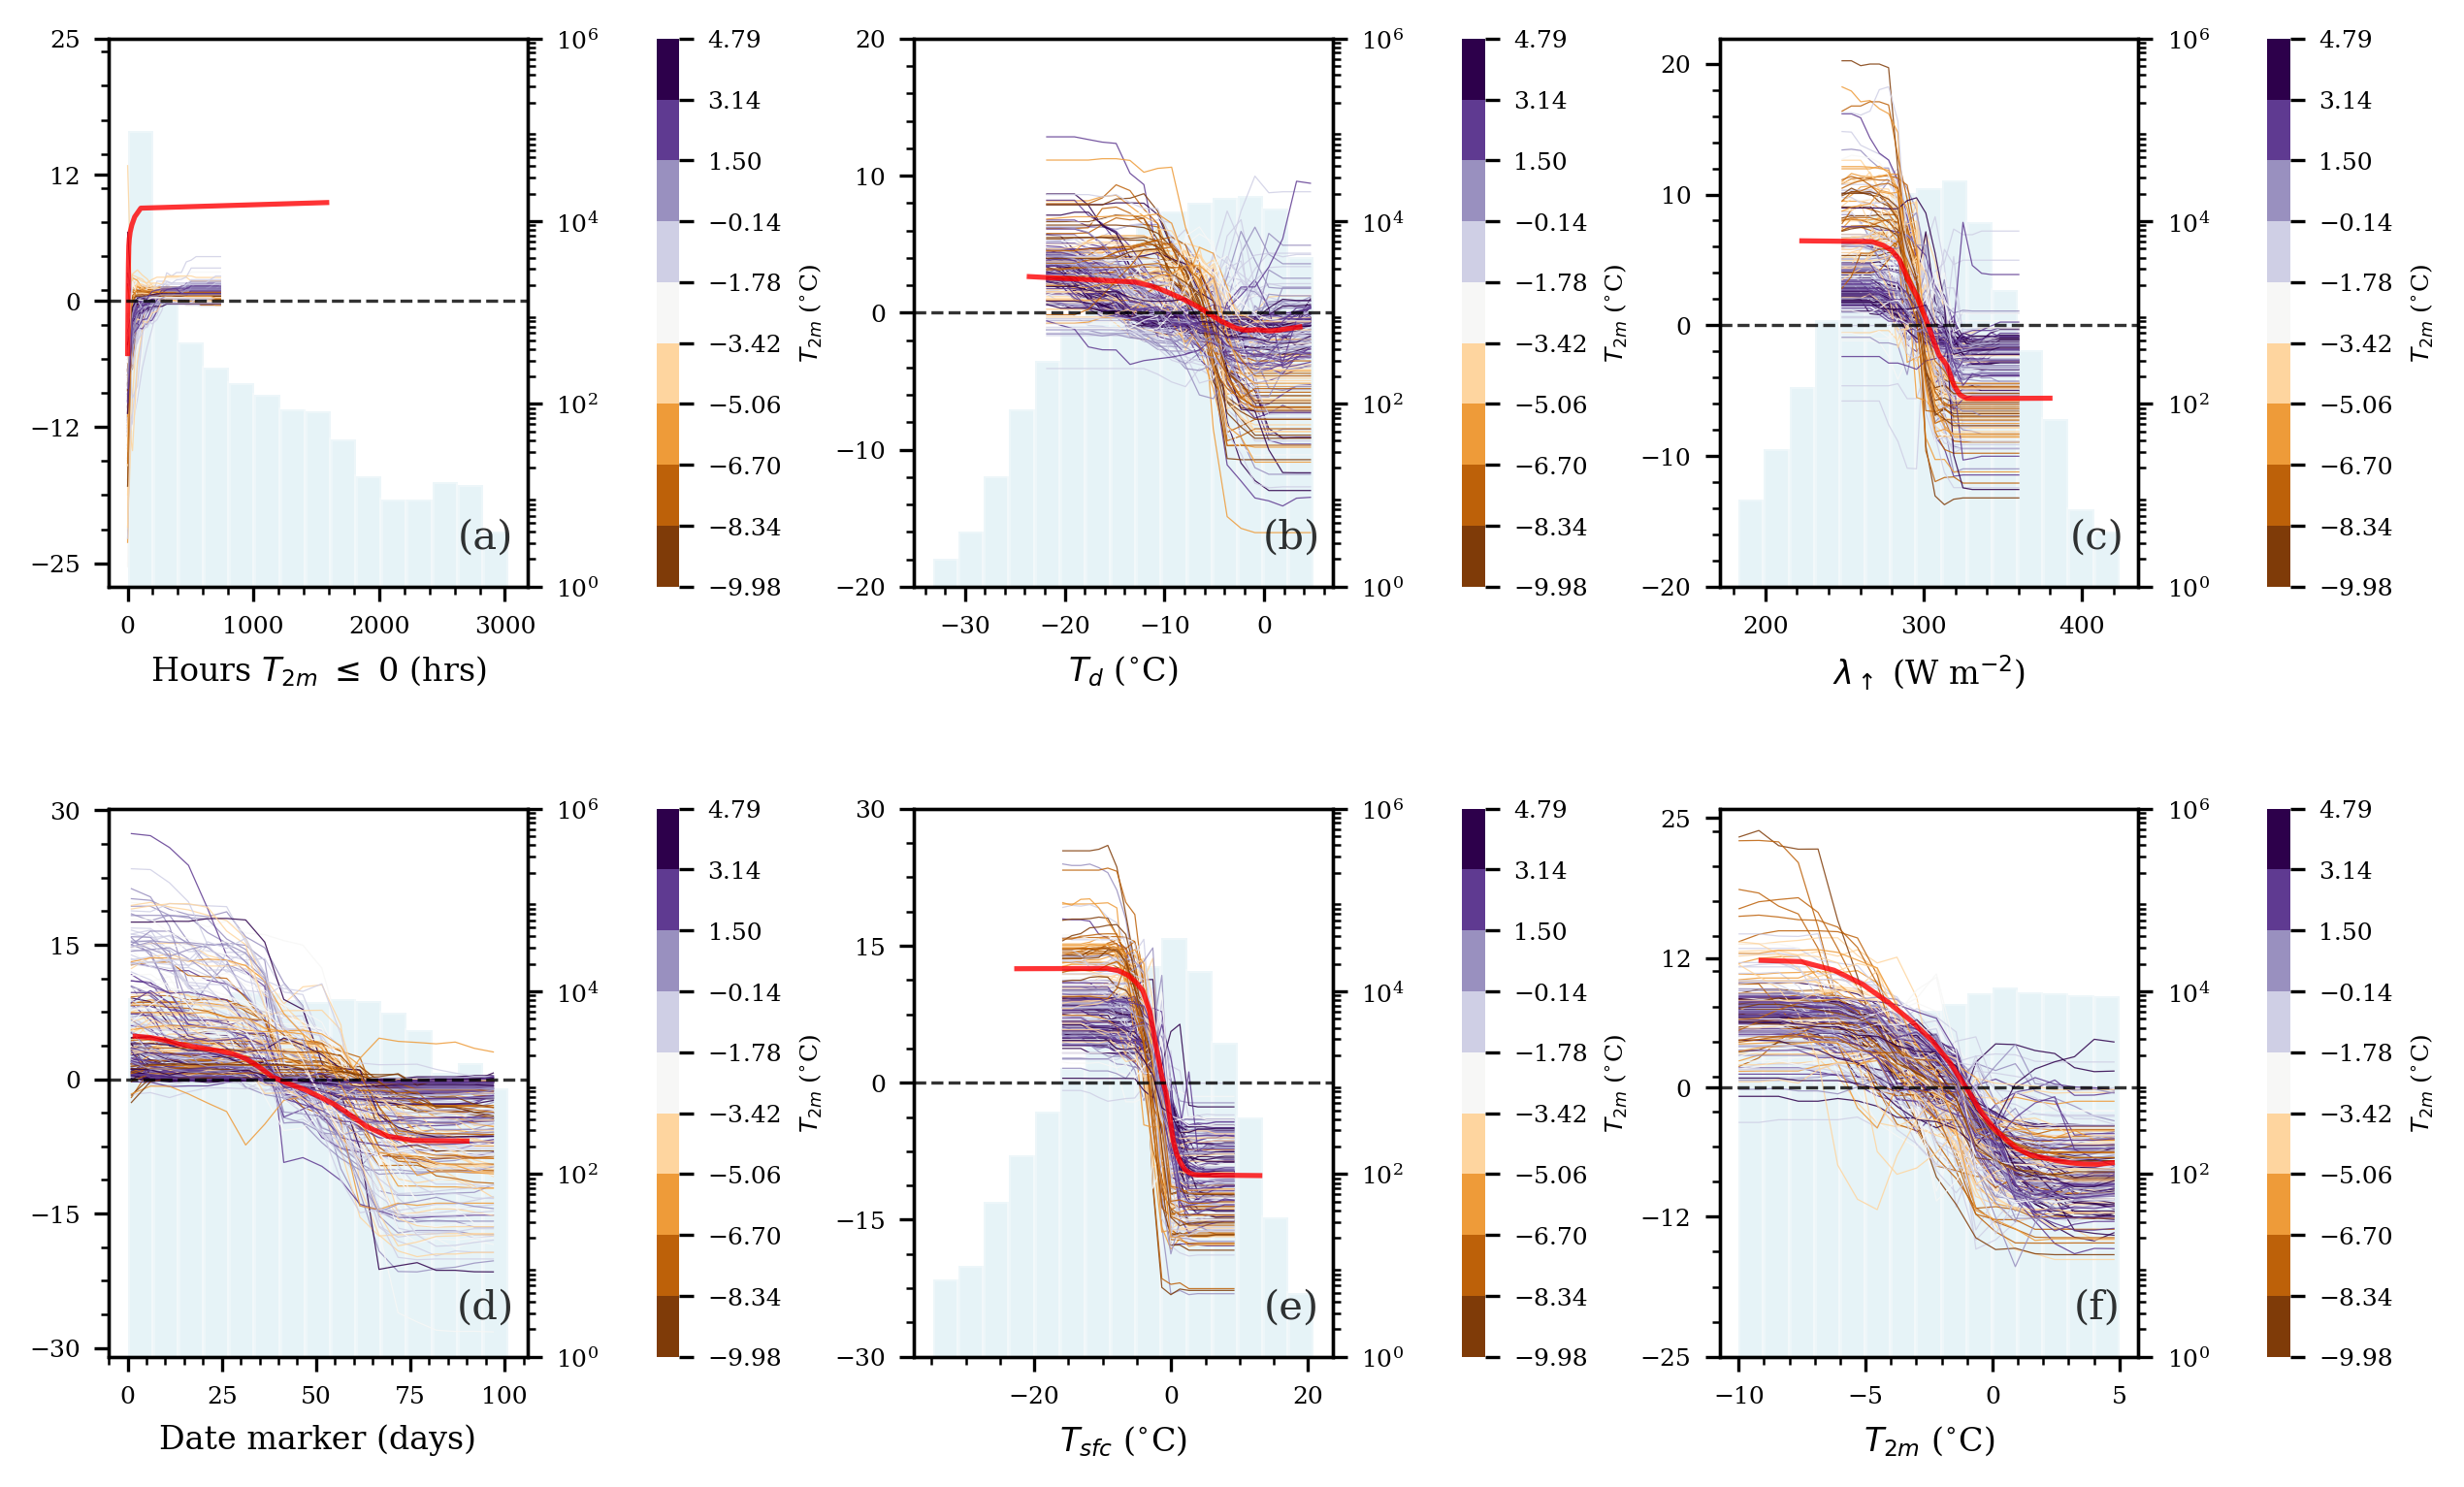

In [5]:
explainer = pymint.InterpretToolkit(estimators[0], X=X, y=y,)

ale_1d_ds = explainer.ale(features=important_vars, n_bootstrap=1, subsample=0.25, n_jobs=1, n_bins=20)
ice_ds = explainer.ice(features=important_vars,  subsample=200, n_jobs=1, n_bins=20, random_seed=50)

fig, axes = explainer.plot_ale(
                               ale=ale_1d_ds,
                                features = important_vars,
                               display_units=plotting_config.display_units,
                               display_feature_names=plotting_config.display_feature_names,
                               ice_curves=ice_ds,
                               color_by = 'temp2m', 
                                figsize=(10,6),
                                wspace=0.25, 
                                    
                                  )
